# Import de librerías

In [160]:
import pandas as pd
import numpy as np
import json
import random
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
%matplotlib inline

# Inspección de los datos

**Lectura del data set de videos**

In [3]:
data = pd.read_csv("../data/DEvideos_cc50_202101.csv")

**Muestra de las 10 primeras filas del dataset**

In [4]:
data.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778)
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822)
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044)
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Bayern,50.266607,10.966607,POINT (10.96660681 50.26660748)
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866)
5,xapGFgWqtg4,17.14.11,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,22,2017-11-13T01:49:24.000Z,[none],32709,3093,296,63,https://i.ytimg.com/vi/xapGFgWqtg4/default.jpg,False,False,False,Wir haben Meinungsstudie.de (► http://bit.ly/2...,Hessen,51.300007,9.500030,POINT (9.500029661999999 51.30000694)
6,EIM7RMe39JY,17.14.11,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13T11:59:04.000Z,"kanaken|""kurden""|""türken""|""schule""|""schulzeit""...",308683,35704,578,1398,https://i.ytimg.com/vi/EIM7RMe39JY/default.jpg,False,False,False,Video mit Planet Kanax: https://youtu.be/3U51c...,Rheinland Pfalz,49.982472,8.273219,POINT (8.273219156 49.98247246)
7,PaWTaj6Iie0,17.14.11,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,22,2017-11-13T18:09:55.000Z,"unbekannte gesichte charakter|""unbekannte gesi...",181660,17998,169,554,https://i.ytimg.com/vi/PaWTaj6Iie0/default.jpg,False,False,False,4 unbekannte Gesichter animierter Charaktere (...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822)
8,GHct2dGNLks,17.14.11,Antoine leiht Auto von Ernährungsberaterin,TeddyComedy,23,2017-11-12T11:53:45.000Z,"Antoine Auto|""Antoine Boot Camp""|""Antoine Ernä...",369173,16953,570,611,https://i.ytimg.com/vi/GHct2dGNLks/default.jpg,False,False,False,Antoine hat sich ein Auto ausgeliehen..schaut ...,Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292)
9,aZYSFByDGkg,17.14.11,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13T15:06:12.000Z,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,425,https://i.ytimg.com/vi/aZYSFByDGkg/default.jpg,False,False,False,"Berühmt werden kann jeder, aber berühmt bleibe...",Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292)


**Muestra de la info del dataset**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40840 non-null  object 
 1   trending_date           40840 non-null  object 
 2   title                   40840 non-null  object 
 3   channel_title           40840 non-null  object 
 4   category_id             40840 non-null  int64  
 5   publish_time            40840 non-null  object 
 6   tags                    40840 non-null  object 
 7   views                   40840 non-null  int64  
 8   likes                   40840 non-null  int64  
 9   dislikes                40840 non-null  int64  
 10  comment_count           40840 non-null  int64  
 11  thumbnail_link          40840 non-null  object 
 12  comments_disabled       40840 non-null  bool   
 13  ratings_disabled        40840 non-null  bool   
 14  video_error_or_removed  40840 non-null

# Pre-procesamiento de datos

**Contador de la cantidad de valores NAN en el dataset**

In [6]:
data.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

**Contador de la cantidad de valores NULL en el dataset**

In [7]:
data.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

**Determinar si existen datos repetidos**

Podemos notar que no existen valores repetidos

In [8]:
data.duplicated().value_counts()

False    40840
dtype: int64

**Eliminación de las filas cuyos video hayan presentando un error o hayan sido eliminados**

In [9]:
data = data.drop(data[data["video_error_or_removed"] == True].index)

**Convertir "trending_date" y "publish_time" a formato fechas**

In [10]:
# Convertir el "trending_date" a formato de fecha
data["trending_date"]= pd.to_datetime(data["trending_date"], format="%y.%d.%m")

In [11]:
# Split del publish time y hour
publish_time = []
publish_hour = []
for value in data["publish_time"].values:
    publish_time.append(value.split("T")[0])
    publish_hour.append(value.split("T")[1])

In [12]:
# Pasar los valores a la columna "publish_time" y crear la columna "publish_hour"
data["publish_time"] = publish_time
data["publish_hour"] = publish_hour

In [13]:
# Convertir el "publish_time" a formato de fecha
data["publish_time"]= pd.to_datetime(data["publish_time"])

**Identificación de los datos atípicos**

<AxesSubplot:>

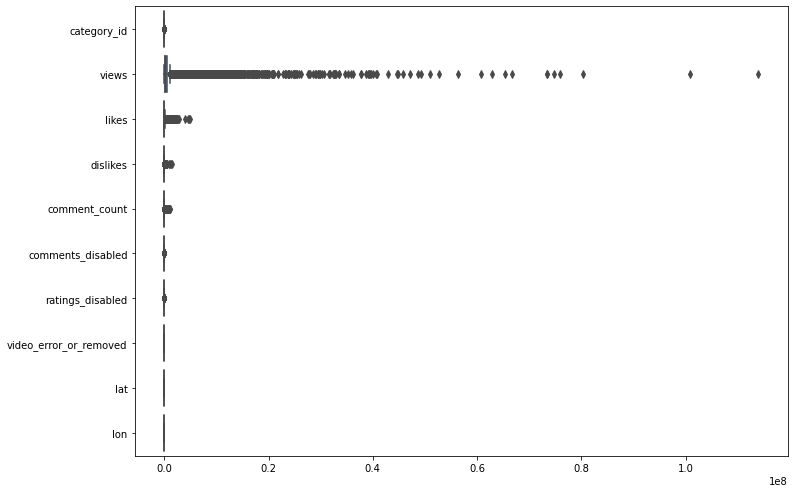

In [14]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=data,palette='rainbow',orient='h')

In [15]:
view_max = np.max(data["views"])
view_id = data[data.views == view_max].index[0]

channel = data["channel_title"][data.index[view_id]]
title = data["title"][data.index[view_id]]
views = data["views"][data.index[view_id]]

print(f"Canal del video con más visitas: {channel}")
print(f"Título del video con más visitas: {title}")
print(f"Número de visitas del video: {views}")

Canal del video con más visitas: YouTube Spotlight
Título del video con más visitas: YouTube Rewind: The Shape of 2017 | #YouTubeRewind
Número de visitas del video: 113876217


In [16]:
lk_max = np.max(data["likes"])
lk_id = data[data.likes == lk_max].index[0]

channel = data["channel_title"][data.index[view_id]]
title = data["title"][data.index[view_id]]
likes = data["likes"][data.index[view_id]]

print(f"Canal del video con más visitas: {channel}")
print(f"Título del video con más visitas: {title}")
print(f"Número de likes del video: {likes}")

Canal del video con más visitas: YouTube Spotlight
Título del video con más visitas: YouTube Rewind: The Shape of 2017 | #YouTubeRewind
Número de likes del video: 2811217


In [17]:
dlk_max = np.max(data["dislikes"])
dlk_id = data[data.dislikes == dlk_max].index[0]

channel = data["channel_title"][data.index[view_id]]
title = data["title"][data.index[view_id]]
dislikes = data["dislikes"][data.index[view_id]]

print(f"Canal del video con más visitas: {channel}")
print(f"Título del video con más visitas: {title}")
print(f"Número de visitas del video: {dislikes}")

Canal del video con más visitas: YouTube Spotlight
Título del video con más visitas: YouTube Rewind: The Shape of 2017 | #YouTubeRewind
Número de visitas del video: 1470386


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40826 entries, 0 to 40839
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40826 non-null  object        
 1   trending_date           40826 non-null  datetime64[ns]
 2   title                   40826 non-null  object        
 3   channel_title           40826 non-null  object        
 4   category_id             40826 non-null  int64         
 5   publish_time            40826 non-null  datetime64[ns]
 6   tags                    40826 non-null  object        
 7   views                   40826 non-null  int64         
 8   likes                   40826 non-null  int64         
 9   dislikes                40826 non-null  int64         
 10  comment_count           40826 non-null  int64         
 11  thumbnail_link          40826 non-null  object        
 12  comments_disabled       40826 non-null  bool  

### Lectura del archivo Json

**Lectura de los nombres de las categorías por "id" y creación de la columna "category" en el dataset**

In [19]:
f = open("../data/DE_category_id.json") # Alemania

dataJson = json.load(f)

f = open("../data/US_category_id.json") # US

dataJsonUS = json.load(f)

d = {}
dUS = {}
for i in dataJson["items"]:
    d[int(i["id"])] = i["snippet"]["title"]
    
for i in dataJsonUS["items"]:
    dUS[int(i["id"])] = i["snippet"]["title"]
    
cate = []
for i in range(len(data.index)):
    cat_id = data.iloc[i]["category_id"]
    # Si falta una categoría del Json de Alemania, se obtiene de US
    if cat_id in list(d):
        cate.append(d[cat_id])
    else:
        cate.append(dUS[cat_id])
    
data["category"] = cate

In [98]:
data.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,publish_hour,category
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,...,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778),17:08:49.000Z,Entertainment
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,...,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822),22:30:01.000Z,Comedy
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97190,6146,...,False,False,False,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044),07:30:00.000Z,Entertainment
3,AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,...,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Bayern,50.266607,10.966607,POINT (10.96660681 50.26660748),15:00:01.000Z,Education
4,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,...,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866),13:10:36.000Z,Entertainment
5,xapGFgWqtg4,2017-11-14,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,22,2017-11-13,[none],32709,3093,296,...,False,False,False,Wir haben Meinungsstudie.de (► http://bit.ly/2...,Hessen,51.300007,9.500030,POINT (9.500029661999999 51.30000694),01:49:24.000Z,People & Blogs
6,EIM7RMe39JY,2017-11-14,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13,"kanaken|""kurden""|""türken""|""schule""|""schulzeit""...",308683,35704,578,...,False,False,False,Video mit Planet Kanax: https://youtu.be/3U51c...,Rheinland Pfalz,49.982472,8.273219,POINT (8.273219156 49.98247246),11:59:04.000Z,Comedy
7,PaWTaj6Iie0,2017-11-14,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,22,2017-11-13,"unbekannte gesichte charakter|""unbekannte gesi...",181660,17998,169,...,False,False,False,4 unbekannte Gesichter animierter Charaktere (...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822),18:09:55.000Z,People & Blogs
8,GHct2dGNLks,2017-11-14,Antoine leiht Auto von Ernährungsberaterin,TeddyComedy,23,2017-11-12,"Antoine Auto|""Antoine Boot Camp""|""Antoine Ernä...",369173,16953,570,...,False,False,False,Antoine hat sich ein Auto ausgeliehen..schaut ...,Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292),11:53:45.000Z,Comedy
9,aZYSFByDGkg,2017-11-14,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,...,False,False,False,"Berühmt werden kann jeder, aber berühmt bleibe...",Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292),15:06:12.000Z,Film & Animation


### Creación del nuevo dataset

In [22]:
data.to_csv('../data/DEvideos_cc50_202101_final.csv',index=False)

# Visualización de datos

In [126]:
data = pd.read_csv("../data/DEvideos_cc50_202101_final.csv")

## Pregunta 1
**¿Qué categorías de videos son las de mayor tendencia?**

<AxesSubplot:xlabel='count', ylabel='category'>

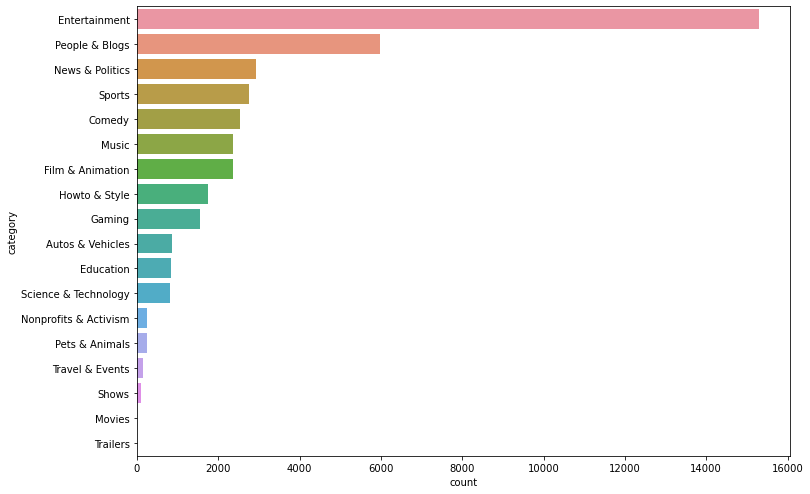

In [127]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='category', data=data, order = data['category'].value_counts().index)

In [128]:
data['category'].value_counts()

Entertainment            15287
People & Blogs            5988
News & Politics           2935
Sports                    2752
Comedy                    2534
Music                     2372
Film & Animation          2368
Howto & Style             1745
Gaming                    1564
Autos & Vehicles           873
Education                  844
Science & Technology       806
Nonprofits & Activism      256
Pets & Animals             251
Travel & Events            141
Shows                      107
Movies                       2
Trailers                     1
Name: category, dtype: int64

## Pregunta 2
**¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?**

**Los que más gustan**

<AxesSubplot:xlabel='likes', ylabel='category'>

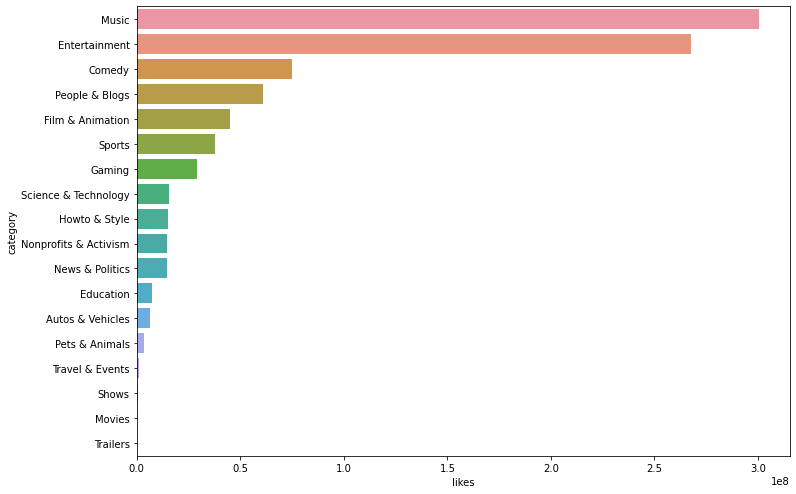

In [129]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y='category', x='likes', data=data, ci=None, estimator=sum,
            order=data.groupby(['category'])['likes'].agg('sum').sort_values(ascending = False).index)

In [130]:
data.groupby(['category'])['likes'].agg('sum').sort_values(ascending = False)

category
Music                    300297066
Entertainment            267652103
Comedy                    74787405
People & Blogs            60920058
Film & Animation          44921148
Sports                    37646423
Gaming                    28862668
Science & Technology      15372868
Howto & Style             15101881
Nonprofits & Activism     14600953
News & Politics           14391904
Education                  7516778
Autos & Vehicles           6143363
Pets & Animals             3351052
Travel & Events             887036
Shows                       378819
Movies                       63834
Trailers                         0
Name: likes, dtype: int64

**Los que menos gustan**

<AxesSubplot:xlabel='dislikes', ylabel='category'>

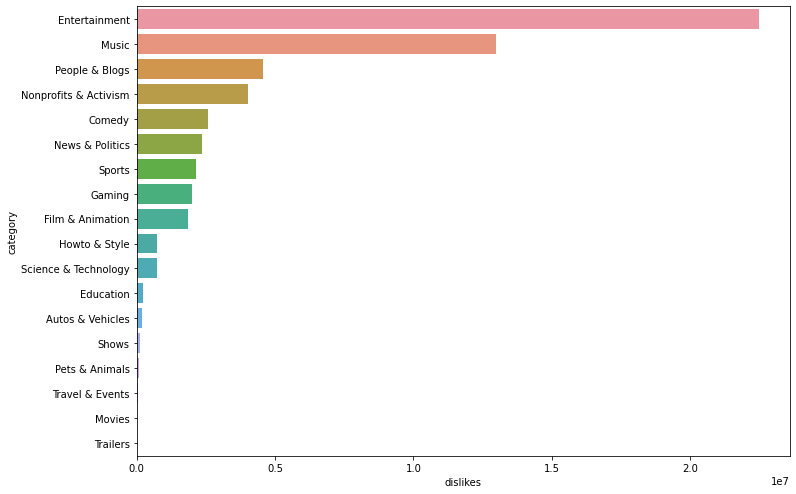

In [131]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y='category', x='dislikes', data=data, ci=None, estimator=sum,
            order=data.groupby(['category'])['dislikes'].agg('sum').sort_values(ascending = False).index)

In [132]:
data.groupby(['category'])['dislikes'].agg('sum').sort_values(ascending = False)

category
Entertainment            22478991
Music                    12985188
People & Blogs            4544157
Nonprofits & Activism     4006492
Comedy                    2557861
News & Politics           2369587
Sports                    2153755
Gaming                    1983880
Film & Animation          1856934
Howto & Style              739287
Science & Technology       737165
Education                  234168
Autos & Vehicles           182704
Shows                       98783
Pets & Animals              81919
Travel & Events             30503
Movies                       2594
Trailers                        0
Name: dislikes, dtype: int64

## Pregunta 3
**¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?**

<ipython-input-133-8f9b483e9270>:1: RuntimeWarning:

invalid value encountered in longlong_scalars



<AxesSubplot:xlabel='ratio', ylabel='category'>

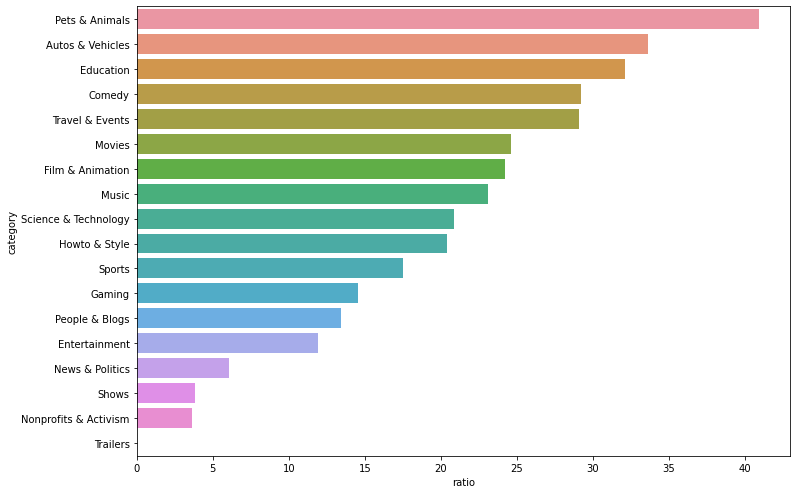

In [133]:
def ratio_likes_dislikes(x): return x['likes'].agg(
    'sum') / x['dislikes'].agg('sum')

r_lk_dlk = data.groupby(['category']).apply(
    ratio_likes_dislikes).sort_values(ascending=False).reset_index(name='ratio')
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='ratio', y='category', data=r_lk_dlk, ci=None)


In [134]:
r_lk_dlk

,category,ratio
0,Pets & Animals,40.906896
1,Autos & Vehicles,33.624677
2,Education,32.099937
3,Comedy,29.238260
4,Travel & Events,29.080287
5,Movies,24.608327
6,Film & Animation,24.191031
7,Music,23.126124
8,Science & Technology,20.854039
9,Howto & Style,20.427630


## Pregunta 4
**¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?**

<ipython-input-135-43110614288a>:1: RuntimeWarning:

divide by zero encountered in longlong_scalars



<AxesSubplot:xlabel='ratio', ylabel='category'>

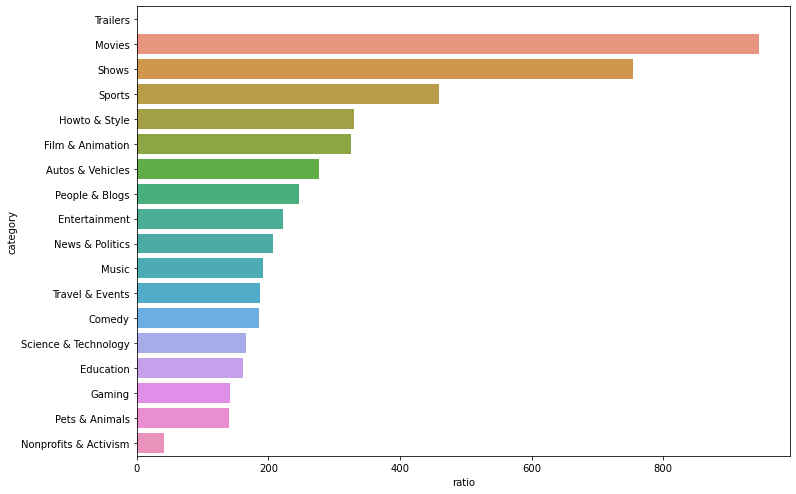

In [135]:
def ratio_views_comment(x): return x['views'].agg(
    'sum') / x['comment_count'].agg('sum')


r_vi_com = data.groupby(['category']).apply(ratio_views_comment).sort_values(
    ascending=False).reset_index(name='ratio')
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='ratio', y='category', data=r_vi_com, ci=None)


In [136]:
r_vi_com

,category,ratio
0,Trailers,inf
1,Movies,945.215143
2,Shows,754.453303
3,Sports,459.245372
4,Howto & Style,330.514588
5,Film & Animation,325.407932
6,Autos & Vehicles,277.118741
7,People & Blogs,245.942828
8,Entertainment,222.098124
9,News & Politics,206.504210


## Pregunta 5
**¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?**

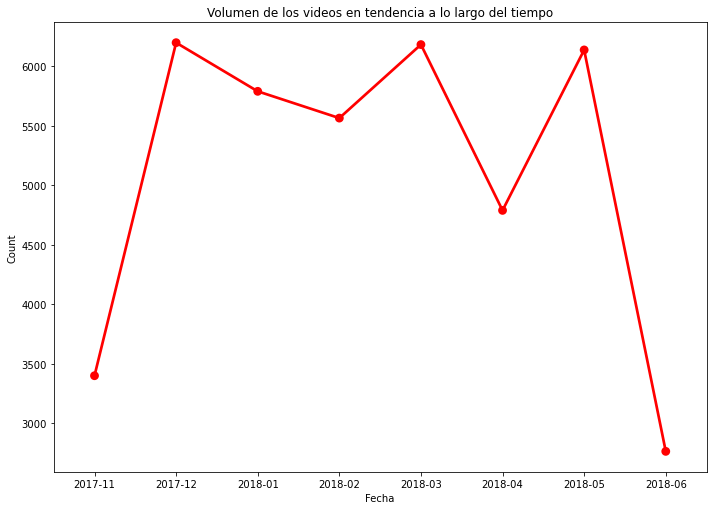

In [137]:
data["trending_date"] = pd.to_datetime(data["trending_date"])
by_tDate = data.groupby(data["trending_date"].dt.to_period('M')).count()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.pointplot(x=by_tDate.index, y='views',data=by_tDate, color="red")
ax.set_xlabel('Fecha')
ax.set_ylabel('Count')
ax.set_title('Volumen de los videos en tendencia a lo largo del tiempo');

In [138]:
by_tDate["views"]

trending_date
2017-11    3399
2017-12    6199
2018-01    5790
2018-02    5565
2018-03    6183
2018-04    4789
2018-05    6138
2018-06    2763
Freq: M, Name: views, dtype: int64

## Pregunta 6
**¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?**

**Mayor frecuencia**

<AxesSubplot:xlabel='count', ylabel='channel_title'>

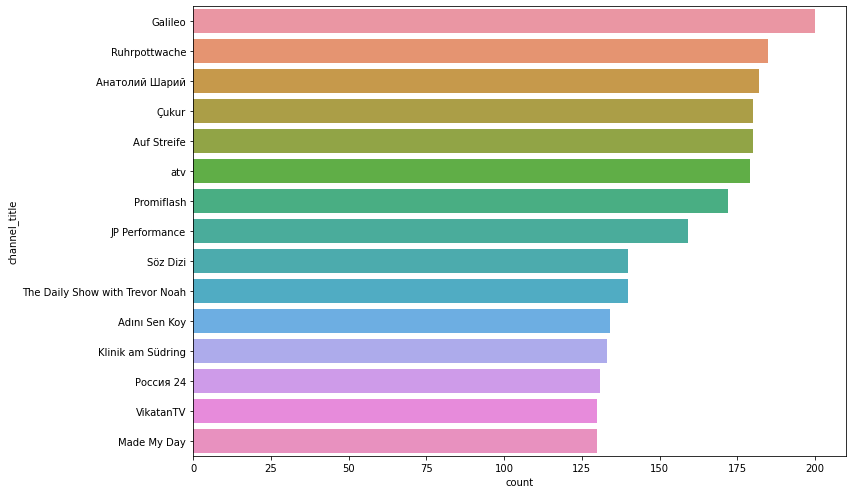

In [139]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='channel_title', data=data, order = data['channel_title'].value_counts().iloc[:15].index)


In [140]:
data['channel_title'].value_counts().iloc[:15]

Galileo                            200
Ruhrpottwache                      185
Анатолий Шарий                     182
Çukur                              180
Auf Streife                        180
atv                                179
Promiflash                         172
JP Performance                     159
Söz Dizi                           140
The Daily Show with Trevor Noah    140
Adını Sen Koy                      134
Klinik am Südring                  133
Россия 24                          131
VikatanTV                          130
Made My Day                        130
Name: channel_title, dtype: int64

**Menor frecuencia**

<AxesSubplot:xlabel='count', ylabel='channel_title'>

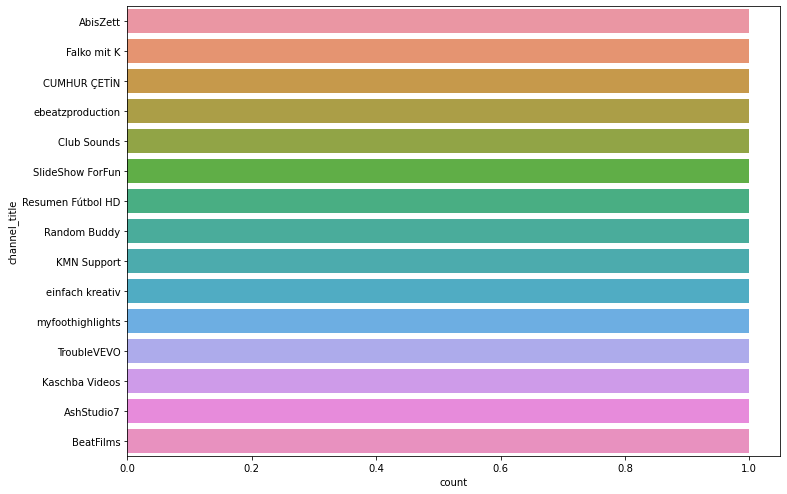

In [141]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='channel_title', data=data, order = data['channel_title'].value_counts().sort_values().iloc[:15].index)

In [142]:
data['channel_title'].value_counts().sort_values().iloc[:15]

AbisZett             1
Falko mit K          1
CUMHUR ÇETİN         1
ebeatzproduction     1
Club Sounds          1
SlideShow ForFun     1
Resumen Fútbol HD    1
Random Buddy         1
KMN Support          1
einfach kreativ      1
myfoothighlights     1
TroubleVEVO          1
Kaschba Videos       1
AshStudio7           1
BeatFilms            1
Name: channel_title, dtype: int64

In [143]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,publish_hour,category
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,...,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778),17:08:49.000Z,Entertainment
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,...,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822),22:30:01.000Z,Comedy
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97190,6146,...,False,False,False,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044),07:30:00.000Z,Entertainment
3,AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,...,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Bayern,50.266607,10.966607,POINT (10.96660681 50.26660748),15:00:01.000Z,Education
4,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,...,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866),13:10:36.000Z,Entertainment


## Pregunta 7
**¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?**

In [153]:
data_state = data.groupby(data["state"]).sum()[["views", "likes", "dislikes"]]
data_state.reset_index(level=0, inplace=True)

In [162]:
dat = dict(
        type = 'choropleth',
        locations = data_state["state"],
        #locationmode = "country names",
        z = data_state["views"],
        text = data_state["views"],
        colorbar = {'title' : 'Views'},
      )

layout = dict(
    title = 'Número de visualizaciones totales por estado (Alemania)',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

choromap = go.Figure(data = [dat],layout = layout)
iplot(choromap,validate=False)

In [154]:
data_state

,state,views,likes,dislikes
0,Baden Wurttemberg,1542170061,53931077,2926202
1,Bayern,1456116037,56423025,2951726
2,Berlin,1535553735,60643112,3329344
3,Brandenburg,1416616819,48026373,3110493
4,Bremen,1556155587,61946034,3852057
5,Hamburg,1783037888,66904878,4738712
6,Hessen,1667128104,60710403,3947336
7,Mecklenburg Vorpommern,1311428753,43426026,2990873
8,Niedersachsen,1478919155,54727860,3140448
9,Nordrhein Westfalen,1561050893,57019591,3099069
